<a href="https://colab.research.google.com/github/jorgenriquez/Inteligencia_artificial/blob/main/Clase_01_Introducci%C3%B3n_al_Aprendizaje_Automatico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción al Aprendizaje Automático

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from skimage import io
from IPython import display

El Aprendizaje Automático__ es un compendio de nuevas técnicas de análisis de datos avanzados que de la mano de la __estadística__ y de los avances de la __programación__ han abierto un nuevo horizonte en campos hasta ese momento vedados al análisis.

Uno de esos campos es sin lugar a duda los campos de la biología, que por la complejidad de sus modelos se encontraba fuera de muchos de los avances que la física matemática había aplicado a otros campos de la ingeniería como la electrotecnia y electrónica, la termodinámica o la mecánica de materiales por ejemplo.

Pero incluso __los modelos informáticos inspirados en procesos biológicos__ se han constituido en __herramientas de propósito general__ para construir los esquemas de trabajo, caso de las __redes neuronales__, o resolver problemas generales, caso de la aplicación de los __algoritmos genéticos__ a la solución de problemas generales de __optimización__.

## Aprendizaje supevisado vs no supevisado. Regresión vs Clasificación

El __Aprendizaje__ Automático hace referencia a la preparación de un __modelo entrenado estadisticamente__ donde se correlacionan unas __observaciones__, llamadas $X$ con una __variable objetivo__ llamada $Y$. Durante el entrenamiento se construye un modelo que relaciona las observaciones recogidas en el conjunto $X$ con la variable recogida en el conjunto $Y$, que son observaciones reales conocidas de antemano.


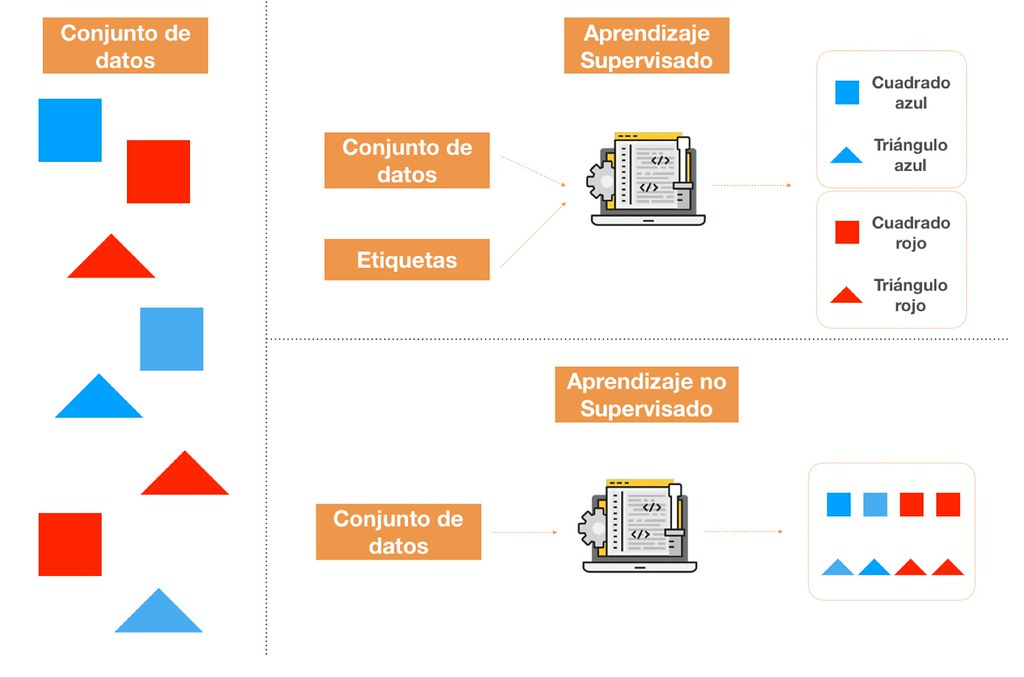

Una vez ajustado el modelo servirá para predecir valores $Y$, objetivos desconocidos, sobre un conjunto de nuevas observaciones $X$. Esto es lo que se denomina __aprendizaje supervisado__, porque en el entrenamiento el disponer de objetivos conocidos $Y$ de unas observaciones $X$ permite supervisar el entrenamiento.

Finalmente hay casos en que ni siquiera conocemos ninguna variable objetivo. Simplemente nos piden que establezcamos una clasificación, (buena, regular, mala) por ejemplo, sobre un conjunto de observaciones de las que no tenemos experiencia previa. En estos casos estaremos hablando de __aprendizaje no supervisado__. Se aplicarán métodos que permiten hacer clasificaciones genéricas no condicionadas por una experiencia previa.

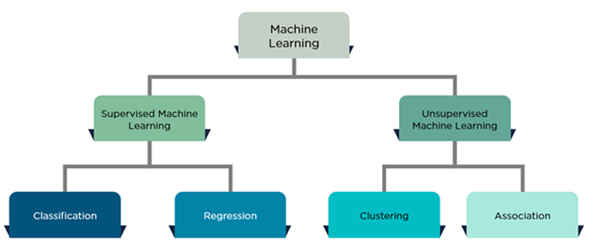

En el aprendizaje supervisado podemos encontrarnos con que los valores $Y$ sean continuos, cualquier valor de los números reales. En este caso los métodos supervisados a aplicar son las __Regresiones__. Mientras que si $Y$ toma sólo un conjunto discreto de valores, supongamos $ \{0, 1, 2, ..., k\} $ hablamos de métodos de __Clasificación__. Resumiendo una primera clasificación del Aprendizaje Automático puede ser:

- __Aprendizaje Supervisado__. Cuando el modelo se ajusta a partir de valores conocidos $X$ e $Y$
    - __Regresiones__. Cuando los valores que toman $Y$ son continuos
    - __Clasificaciones__. Cuando los valores que toman $Y$ son discretos
- __Aprendizaje no Supervisado__. Cuando partimos de valores $X$ para ajustar un modelo.

## **Regresión vs Clasificación**

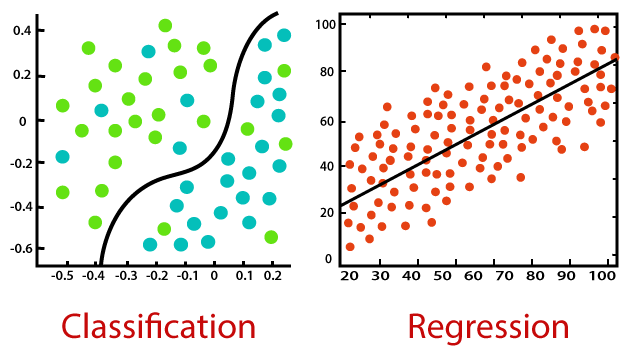

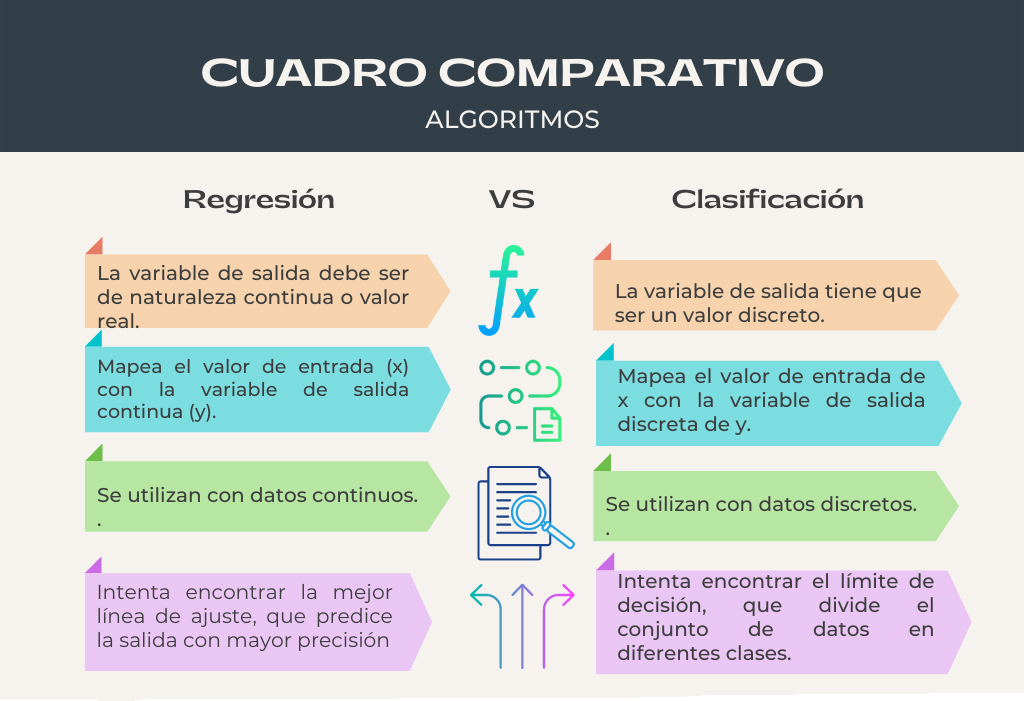

## Las matrices $X$ e $Y$

Un __conjunto de características__ $X$ se puede definir como una __matriz__ de $N$ filas y $n$ columnas. Las $N$ filas hacen referencia al numero de observaciones registradas o número de individuos de la muestra de partida o entrenamiento. Mientras que $n$ es el número de características observadas y hace referencia a la dimensión de las observaciones. En cada individuo del conjunto recogemos $n$ caracteristicas distintas. Si estamos haciendo un estudio médico sobre 1.000 individuos, $N=1.000$ y si a cada individuo le medimos la presión arterial, el nivel de glucosa y el nivel de colesterol, $n=3$. Podremos recoger los datos de nuestro conjunto de entrenamiento en una matriz $1.000 \times 3$.

$$X=\begin{bmatrix}
  x_{11} & x_{12} & \cdots & x_{1n} \\
  x_{21} & x_{22} & \cdots & x_{2n} \\
  \vdots & \vdots & \ddots &  \vdots \\
  x_{N1} & x_{N2} & \cdots & x_{Nn} \\
 \end{bmatrix}$$

Si el estudio médico es un modelo __supervisado__ las variables objetivo $Y$ que permiten entrenar el modelo se pueden definir como una matriz columna de $N$ filas o una matriz $N \times 1$

$$Y=\begin{bmatrix}
  y_1 \\
  y_2 \\
  \vdots \\
  y_N \\
 \end{bmatrix}$$


## Los conjuntos de entrenamiento y validación, train y test, en el aprendizaje automático

El ajuste del modelo estadistico de un método supervisado se realiza sobre una parte de los conjuntos $X$ e $Y$ de partida. Se hace una partición tanto de $X$ como de $Y$ en dos subconjuntos. El primero, que se denomina de __entranamiento__ o __train__ se utiliza para hacer realmente el ajuste del modelo. Y este ajuste se valida en el subconjunto que se ha reservado a tal fin y al que se da el nombre de conjunto de __test__ o __validación__.

Esto es así porque los métodos de ajuste pueden conseguir una convergencia sobre el conjunto de entrenamiento que sea ficticia, lo que se llama __sobreajuste__, y luego al validar se comprueba que el ratio de éxito es muchísimo menor. Esto puede ser así porque realmente el modelo no tenga convergencia o correlación real.

<img src="https://github.com/jorgenriquez/Inteligencia_artificial/blob/main/images/Training.png?raw=1" width="600px">


## Tratamiento de los Datos

Antes de empezar a aplicar ningún método entrenamiento es necesario cargar los datos desde el soporte de archivos o base de datos donde se encuentren. Aquí se cargarán desde archivos que se esperan en la carpeta __data__ utilizando la librería __Pandas__.

Una vez cargado es necesario un proceso de filtrado y depuración para que sea compatible con los procedimientos que se van a aplicar. Así será necesario eliminar valores nulos o convertir valores alfabéticos en númericos.

Gestionar los datos nulos o datos perdidos se puede realizar con diferentes extrategias:
- __Descartar__ los registros incompletos.
- __Imputar__ un dato por cada valor perdido reemplazando por la __media__ o la _mediana_.
- __Imputar__ en base a una __regresión__, donde el dato perdido se sustituye por uno _predicho_.

Además puede surgir la necesidad de transformar los datos:
- __Estandarización__ : restando la media $\mu_i$ y dividiendo por la desviación típica $\sigma_i$ en cada una de las $i$ columnas de la matriz $X$ con $i=1,...,n$.
- Convertir datos __alfabéticos__ en __númericos__. Por ejemplo en la matriz $Y$ se sustituyen los nombres de las etiquetas por enteros $0, 1, ..., K$.

Finalmente puede ser de interés hacer un __análisis de componentes principales (PCA)__ en la matriz $X$.

### Eliminación de Nulos

El archivo __breast_cancer_conNulos.csv__ contiene datos con valores nulos en algunas de sus características. La variable objetivo __y__ es __diagnose__  con valores 0 (benigno, no canceroso) o  1 (maligno, canceroso), respectivamente. El resto de variables son características que constituyen la matriz __X__.

Realiar lo siguiente:

- Cargar con Pandas el archivo.
- Evaluar si existen valores nulos o perdidos
- Eliminar en Pandar los valores nulos.
- Cargar las matrices X e y

Primero se comienza cargando desde la librería Pandas los datos del fichero a un objeto __DataFrame__. Ésto lo realiza la función __read_csv__ que lee el fichero CSV.

https://pandas.pydata.org/docs/index.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

Los valores perdidos se pueden detectar y eliminar desde el objeto _DataFrame_ con los métodos __isna()__ y __dropnan()__ respectivamente.


In [ ]:
import pandas as pd
df = pd.read_csv('data/breast_cancer_conNulos.csv')
df.head()

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,diagnose
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,0


__Se detectan si existen o no valores perdidos o nulos__

Los registros con nulos aparecen arriba y con True.

In [ ]:
df.isna()

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,diagnose
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
683,False,True,True,False,False,True,False,True,True,False
684,True,True,False,False,False,False,False,True,True,False
685,True,False,True,False,False,False,True,False,True,False
686,True,False,False,True,False,False,True,False,True,False


__Se borran los valores nulos__

In [ ]:
df=df.dropna()
df

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,diagnose
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,0
679,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0
680,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,1
681,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0,1


__Extraer las matrices X e y__

El DataFrame tiene la variable __values__ o el método __to_numpy()__ para volcar la información a un array de doble dimensión.

La matriz __X__ está formada por las 9 primeras columnas y la __y__ es la columna 9. Se pueden extraer por posiciones:

In [ ]:
X = df.to_numpy()[:, 0:9]
y = df.to_numpy()[:, 9]
X.shape, y.shape

((683, 9), (683,))

__También se puede hacer usando los nombres de las columnas__

In [ ]:
columnX = df.columns[0:9]
columnY = df.columns[9]
print(columnX, columnY)
X = df[columnX].to_numpy()
#y = df[columnY].to_numpy()
y = df['diagnose'].to_numpy()
X.shape, y.shape

Index(['clump_thickness', 'cell_size_uniformity', 'cell_shape_uniformity',
       'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses'],
      dtype='object') diagnose


((683, 9), (683,))

### Estandarización de la matriz X

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
df_std = pd.DataFrame(X_std, columns = columnX)
df_std.head()

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,0.197905,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484
1,0.197905,0.277252,0.262783,0.758032,1.695166,1.772867,-0.181827,-0.285105,-0.3484
2,-0.511643,-0.702212,-0.741774,-0.639366,-0.555608,-0.424217,-0.181827,-0.612927,-0.3484
3,0.552679,1.583204,1.602192,-0.639366,-0.105454,0.125054,-0.181827,1.354008,-0.3484
4,-0.156869,-0.702212,-0.741774,0.059333,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484


## Análisis de Componentes Principales

El análisis de componentes principales (PCA) ({cite:p}`jolliffe1986generalizations`) es una transformación lineal sobre las $n$ componentes de la matriz __X__. La matriz __X__ está formada por $N$ observaciones $\{x^1, ..., x^N\}$ donde cada observación es un vector de $n$ componentes:
$$x^i=(x^i_1, ..., x^i_n)$$

Primero se proyecta los datos contenidos en __X__ sobre un espacio 1-dimensional de base $u_1=(u_{11},...,u_{1n})^T$. Hacemos que el vector sea ortonormal: $u_1^Tu_1=1$

La proyección de cada observación vendrá dada por $u^T_1x^i$ . Y la varianza de los datos proyectados será:

$$\frac{1}{N} \sum^N_{i=1} (u^T_1x^i - u^T_1 \bar{x})^2 = u^T_1 S u_1$$

Donde $\bar{x}=\frac{1}{N} \sum^N_{i=1} x^i$ es el vector media de los datos y $S$ la matriz de covarianza de dimensión $n\times n$

$u_1$ será el primer componente principal si maximiza la varianza:

$$\max\limits_{u_1} u^T_1 S u_1 \; \text{sujeto a} \; u_1^Tu_1=1$$

Optimización de una función de $n$ variables con condición que introduciendo el multiplicador de Lagrange $\lambda_1$ :

$$\max\limits_{u_1} u^T_1 S u_1 + \lambda_1(1 - u_1^Tu_1)$$

Se resuelve derivando con respecto a $u_1$ e igualando a cero:

$$ S u_1=\lambda_1 u_1$$

Esta ecuación indica que $u_1$ y $\lambda_1$ son respectivamente el autovector y autovalor de la matriz de covarianza $S$. Además si premultiplicamos la anterior ecuación por $u^T_1$ se ve que $\lambda_1$ es la varianza:

$$ u^T_1 S u_1=\lambda_1$$

La segunda componente principal $u_2$ será una nueva dirección ortonormal a $u_1$ con la máxima varianza de todas las posibles direcciones ortogonales. Dado que $S$ es una matriz simétrica $n \times n$ siempre existirán $n$ autovectores ortonormales $u_i$ y como la varianza viene dada por los autovalores $\lambda_i$, el procedimiento es:

- Obtener la matriz de covarianza $S=\frac{1}{N}(X - \bar{x})^T(X - \bar{x})$ a partir de $X$.
- Calcular los autovectores $u_i$ de $S$ en orden de mayor a menor valor de los autovalores $\lambda_i$.
- Proyectar $X$ sobre las $K$ componentes principales deseadas

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
from sklearn.decomposition import PCA
X = df.to_numpy()[:,0:4]
y = df.to_numpy()[:,4]
pca = PCA(n_components=None)
X_pca = pca.fit_transform(X)
Varianzas=pca.explained_variance_ratio_
Varianzas

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

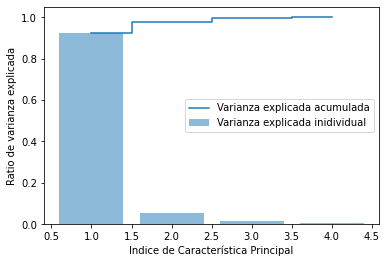

In [ ]:
var_exp = pca.explained_variance_ratio_
tot = len(var_exp)
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,tot+1), var_exp, alpha=0.5, align='center',label='Varianza explicada inidividual')
plt.step(range(1,tot+1), cum_var_exp, where='mid',label='Varianza explicada acumulada')
plt.ylabel('Ratio de varianza explicada')
plt.xlabel('Indice de Característica Principal')
plt.legend(loc='best')
plt.show()

__Se eligen 2 componentes y se proyecta y se representa sobre esas 2 componentes__

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

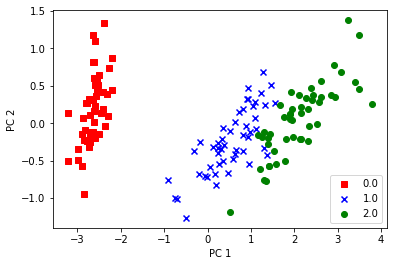

In [ ]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y), colors, markers):
    plt.scatter(X_pca[y==l, 0], X_pca[y==l, 1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower right')
plt.show()

__Se revisan los resultados haciendo los cálculos paso a paso__

In [ ]:
## Calculo de la matriz de covarianza
## means = [ np.mean(X[:,i]) for i in range(X.shape[1])] ## Vector de medias
## S = np.dot(np.transpose(X-means), X-means)/X.shape[0] ## Matriz de covarianza
S = np.cov(X.T)  ## Función de Numpy
## Calculo de los autovalores y autovectores
eigen_vals, eigen_vecs = np.linalg.eig(S)
eigen_vals

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

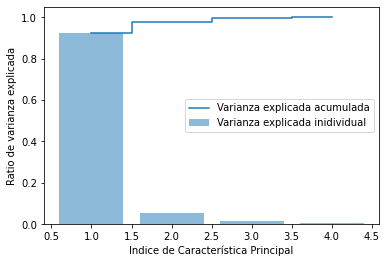

In [ ]:
var_exp = eigen_vals / np.sum(eigen_vals)  ## Calculamos en ratio
tot = len(var_exp)
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,tot+1), var_exp, alpha=0.5, align='center',label='Varianza explicada inidividual')
plt.step(range(1,tot+1), cum_var_exp, where='mid',label='Varianza explicada acumulada')
plt.ylabel('Ratio de varianza explicada')
plt.xlabel('Indice de Característica Principal')
plt.legend(loc='best')
plt.show()

El __método de componentes principales no está dirigido a seleccionar las características de la matriz inicial X__ con más varianza, sino que permiten proyectar sobre un nuevo espacio K-dimensional eligiendo las dimensiones que garantizan un ratio de la varianza total.

## Matriz de correlación y gráfico de dispersión entre características

Aunque está más dirigido a los problemas de regresión entre variables continuas, es posible hacer un estudio de que __caracteristicas se correlacionan mejor entre sí__ o bien a traves de la __matriz de correlación__ o dibujando el __gráfico de dispersión 2 a 2__ de todas las características de __X__

_Por ejemplo en el conjunto Iris la matriz de correlación entre las 4 características de la matriz_ __X__ y el __grafico de dispersión entre las características__ es:

In [ ]:
df_cov = pd.DataFrame(np.corrcoef(X.T), columns=iris.feature_names)
df_cov.insert(loc=0, column='Correlación', value=iris.feature_names)
df_cov

,Correlación,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,sepal length (cm),1.000000,-0.117570,0.871754,0.817941
1,sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
2,petal length (cm),0.871754,-0.428440,1.000000,0.962865
3,petal width (cm),0.817941,-0.366126,0.962865,1.000000


__Gráfico de dispersión entre características__

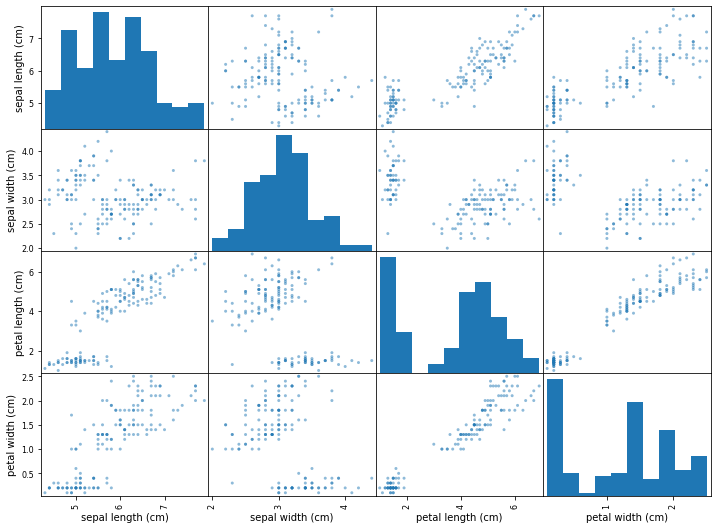

In [ ]:
axes=pd.plotting.scatter_matrix(df[iris.feature_names], figsize=(12,9))